# Matplotlib Pyplot

The `matplotlib.pyplot` module is a collection of functions that let us get up and running with visualization quickly. Interacting with `pyplot` directly is referred to as the state-machine interface of Matplotlib. This is the first of two approaches that we will take. 

There are two things that we want to keep in mind with `pyplot`: one, `pyplot` is stateful; and two, `pyplot` tries to set reasonable defaults for us. These two things together can make `pyplot` feel a bit like magic. If you find yourself thinking, "Wait a minute, what is Matplotlib doing here?", then hang tight. When we introduce the next Matplotlib interface, then things may seem a bit more clear.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Let's make our runs consistent
np.random.seed(13)

## Data

Let's start by creating some simple curves to plot.

In [3]:
squares = [x**2 for x in range(11)]
cubes = [x**3 for x in range(11)]
quads = [x**4 for x in range(11)]

In [4]:
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

## A Simple Plot

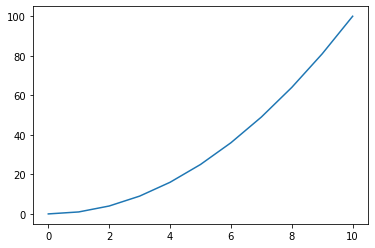

In [5]:
plt.plot(squares)
plt.show()

This is about as simple as a Matplotlib figure can get. Given `squares`, a Python list of the first 10 squares, Matplotlib gives us a line plot. The `pyplot` module is inferring a lot here. Notice that we did not specify our x and y axes. We didn’t even tell it Matplotlib that we were looking to plot a curve here!

Also note that we never instantiated an object from the pyplot module. Instead, we are calling the module directly. First, we feed our data into `plt.plt(squares)`, then we call `plt.show()` to render our figure. If we were to call `plt.show()` again without passing the data back into `plt.plot()`, Matplotlib will not render the figure a second time. That is because Matploglib clears the state of our plot as soon as we call `show`.

In [6]:
# Where did our state go?
plt.show()

`pyplot` gives us some functions to add titles, axis labels, and more

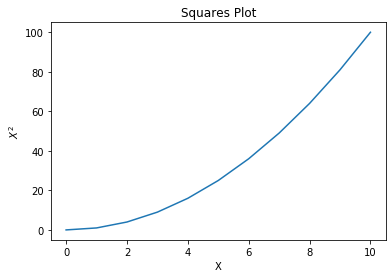

In [7]:
plt.plot(squares)
plt.title('Squares Plot')
plt.ylabel(r'$X^{2}$') # note the LaTeX
plt.xlabel('X')
plt.show()

## Plotting Multiple Curves

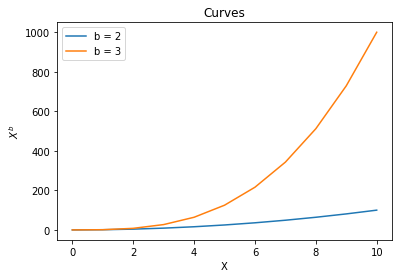

In [8]:
plt.plot(squares, label='b = 2')
plt.plot(cubes, label='b = 3')
plt.title('Curves')
plt.ylabel(r'$X^{b}$')
plt.xlabel('X')
plt.legend(loc="upper left")
plt.show()

Note how the scale of the y-axis changed in this figure. Scale is something that is important to consider whenever we are working with visualizations. Since Matplotlib is keeping the overall dimensions of the figure the same across each of these figures, the curves can look deceptive. Take a close look at the orange curve, $X^{b}$ where $b = 3$. If you were to quickly glance at this figure compared with the previous figure, you might think that the only change we made was the color of the curve! 

It is always a good idea to think about how relative scale effects our perceptions of visualization. This is also true of color choices, and a host of other design features. Time to take some studio art classes! 

## Plotting Multiple Subplots

Maybe our plot will be more clear if we separate the two plots into two subplots.

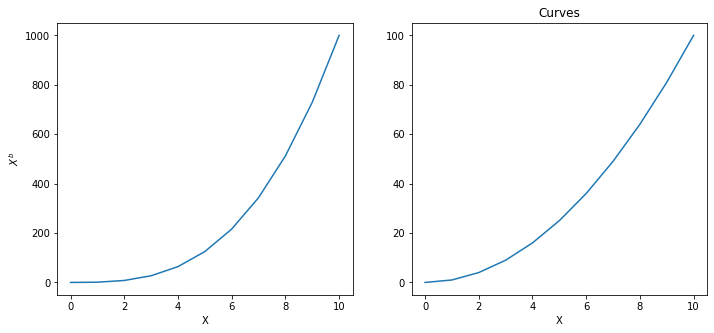

In [9]:
plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.plot(cubes, label='b = 3')
plt.ylabel(r'$X^{b}$')
plt.xlabel('X')
plt.subplot(132)
plt.plot(squares, label='b = 2')
plt.title('Curves')
plt.xlabel('X')
plt.show()

Oh no, this is worse! Look at those y-axis scales! And why is the title associated with the second subplot. And we no longer have a legend since these plots don't belong to the `Axes`. Which one of these curves corresponds to $X^{2}$ again?

## What happens when we keep adding on?

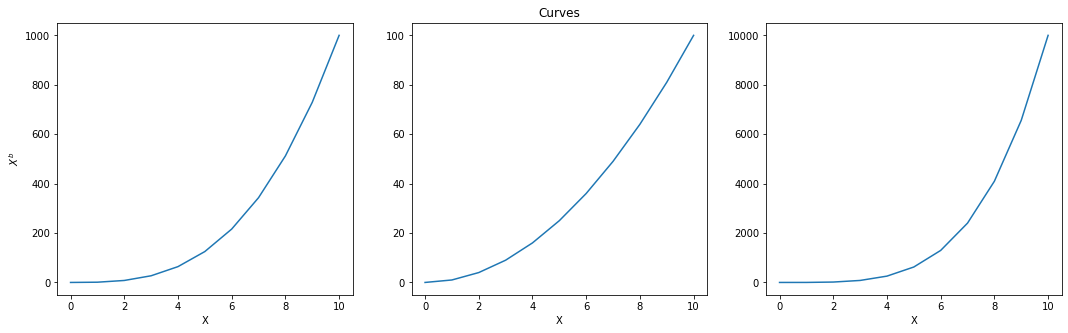

In [10]:
plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.plot(cubes, label='b = 3')
plt.ylabel(r'$X^{b}$')
plt.xlabel('X')
plt.subplot(132)
plt.plot(squares, label='b = 2')
plt.title('Curves')
plt.xlabel('X')
plt.subplot(133)
plt.plot(quads, label='b = 4')
plt.xlabel('X')
plt.show()

This is getting out of hand. Look at all of that repetition! You know how I created this figure? I copied and pasted snippets from the previous figure, and then modified some of the variables. The horror. What if I messed up when editing, or accidentally copied the wrong bit of the previous code? But hey, that title is now centered in the figure.

Since this is confusing, let's go back the single plot:

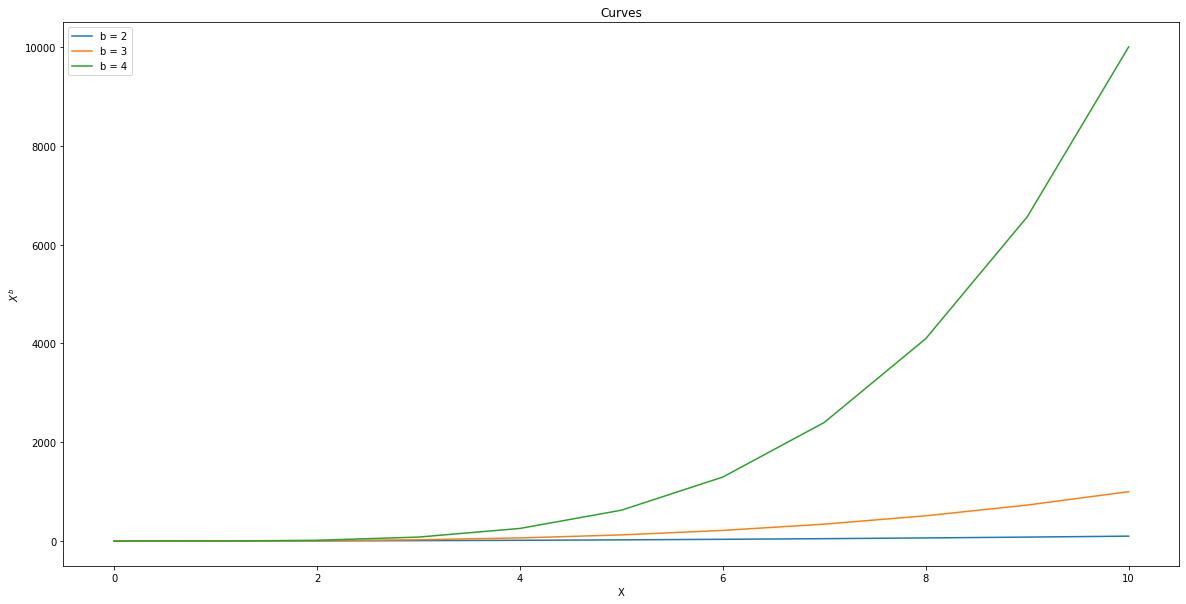

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(squares, label='b = 2')
plt.plot(cubes, label='b = 3')
plt.plot(quads, label='b = 4')
plt.ylabel(r'$X^{b}$')
plt.xlabel('X')
plt.title('Curves')
plt.legend()
plt.show()

## Not All Plots Are Line Plots, Todd

the default plot in `pyplot` is a line plot, but are other functions in the module that we can use.

### Scatter Plot

In [12]:
num_points = 30
x = np.random.rand(num_points)
y = np.random.rand(num_points)
colors = np.random.rand(num_points)
size = (50 * np.random.rand(num_points))**2

print(f'First five entries of size:\n\n{size[:5]}')

First five entries of size:

[1783.19778834 1120.26145061   29.86890733   19.47171832 2335.12219308]


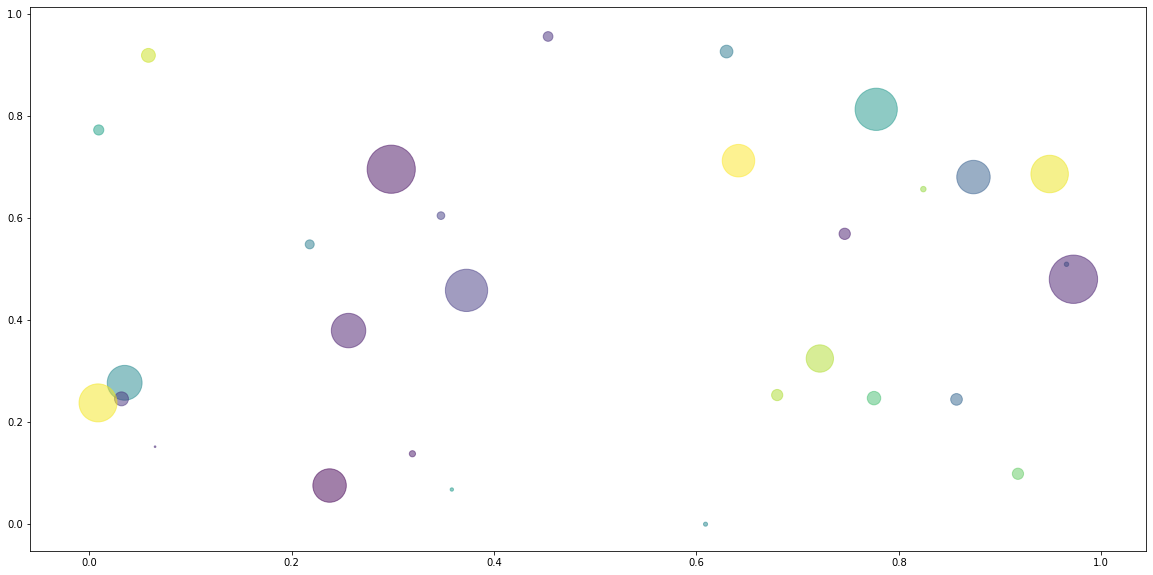

In [13]:
plt.figure(figsize=(20, 10))
plt.scatter(x, y, s=size, c=colors, alpha=0.5)
plt.show()

By using an `alpha=0.5`, we can some transparency. This can be helpful when some of the visual information contained in your plot overlaps.

### Bar Plot

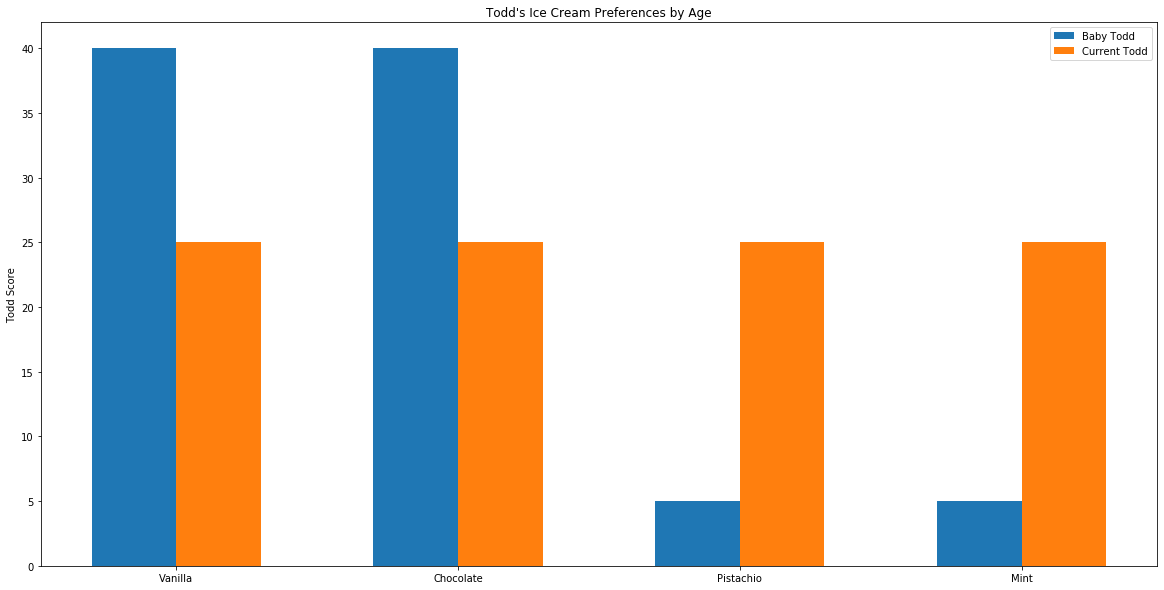

In [14]:
labels = ['Vanilla', 'Chocolate', 'Pistachio', 'Mint']
young_todd = [40, 40, 5, 5]
less_young_todd = [25, 25, 25, 25]

label_loc = np.arange(len(labels))
# What happens if we try to use a list?
#label_loc = [x for x in range(len(labels))]
width = 0.3

plt.figure(figsize=(20, 10))
plt.bar(label_loc - width/2, young_todd, width, label="Baby Todd")
plt.bar(label_loc + width/2, less_young_todd, width, label="Current Todd")

plt.title("Todd's Ice Cream Preferences by Age")
plt.ylabel('Todd Score')
plt.xticks(ticks=label_loc, labels=labels)
plt.legend()

We have only scratched the surface with these plots. You can really fine tune your visualizations to meet your needs. If you are like me, remembering all of details can be a bit cumbersome. How do I set my x-axis labels, What was that thing about offsetting bars in a bar plot? What are the parameters of `plt.xticks`? Luckily, the docs have our back.

In [15]:
# Check a function's documentation
# plt.xticks?

### Histograms

Text(0.5, 1.0, 'Three Gaussian Distributions')

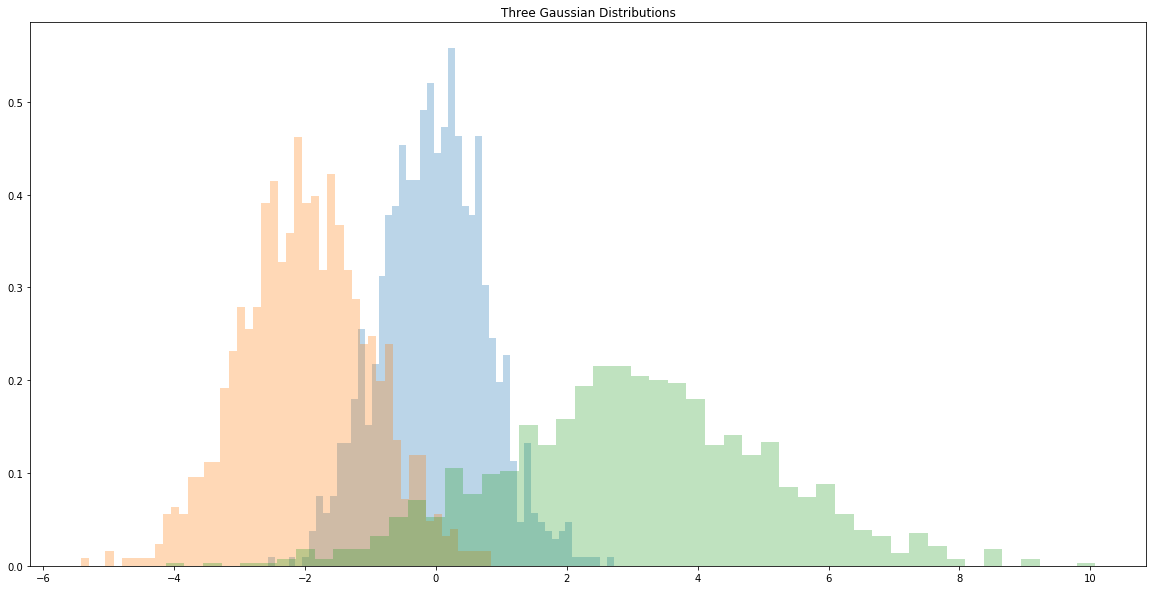

In [16]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(density='stepfilled', alpha=0.3, bins=50)

plt.figure(figsize=(20, 10))
_ = plt.hist(x1, **kwargs)
_ = plt.hist(x2, **kwargs)
_ = plt.hist(x3, **kwargs)

plt.title("Three Gaussian Distributions")

We could get into a lot more detail here. But, before we do, this might be a good time to introduce the second interface for Matplotlib. Let's switch over to our next notebook, `module_02_02_matplotlib_object_oriented.ipynb`. 